# Mask Parameter Optimization for X-Ray Ptychography

This notebook demonstrates how to optimize the structured illumination mask for maximum information content in ptychographic measurements.

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import jax
import jax.numpy as np
import jax.nn as nn
jax.config.update("jax_enable_x64", True)

import optax
import matplotlib.pyplot as plt
from ideal.imaging_systems.xray_ptychography import xray_ptychography


2025-01-13 13:03:30.971548: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 13:03:30.971580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 13:03:30.972321: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Create imaging system
system = xray_ptychography.XRayPtychography(seed=0)

2025-01-13 13:03:32.694245: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.3 which is older than the ptxas CUDA version (12.6.85). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


(<Figure size 1500x500 with 6 Axes>, <Figure size 1500x500 with 6 Axes>)

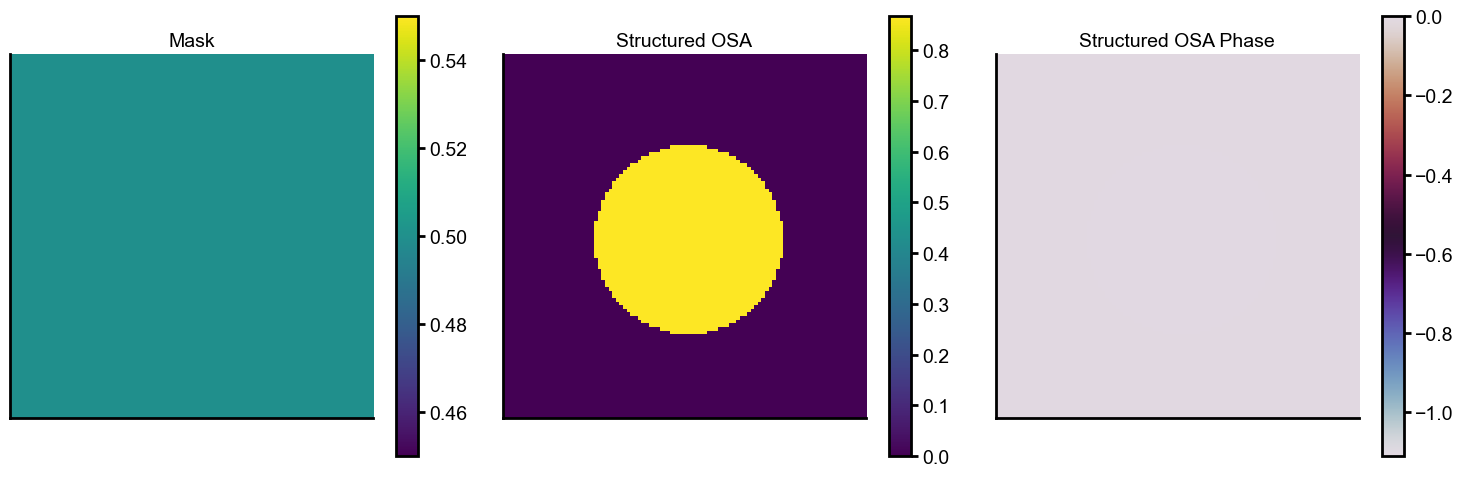

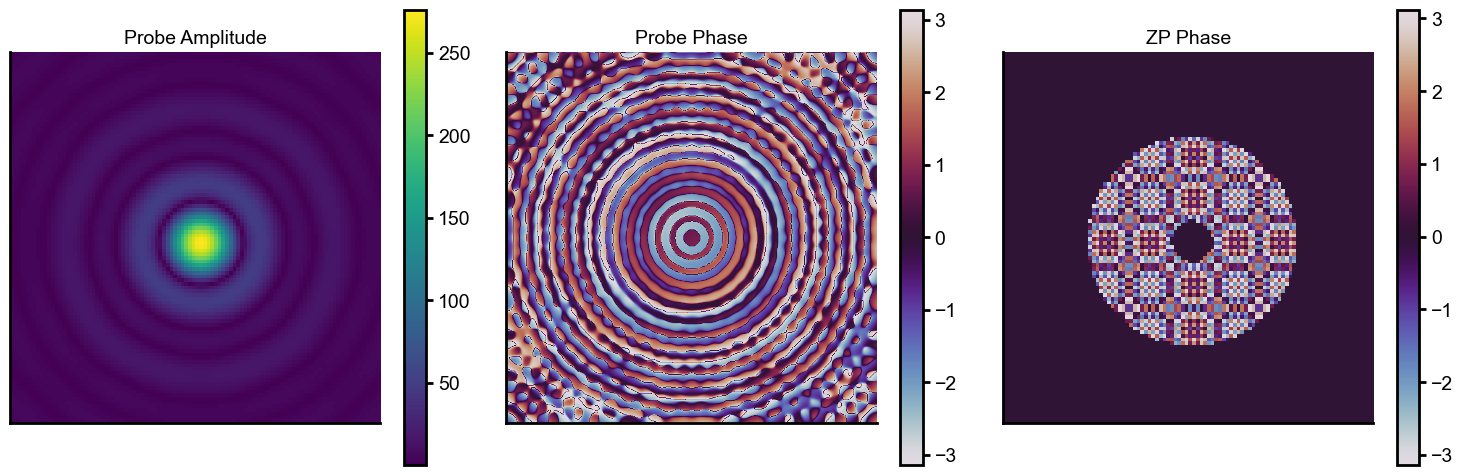

In [3]:
system.visualize_system()

## 2. Generate Test Images and Measurements

/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=float64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)


(<Figure size 1600x400 with 4 Axes>, <Figure size 400x1600 with 8 Axes>)

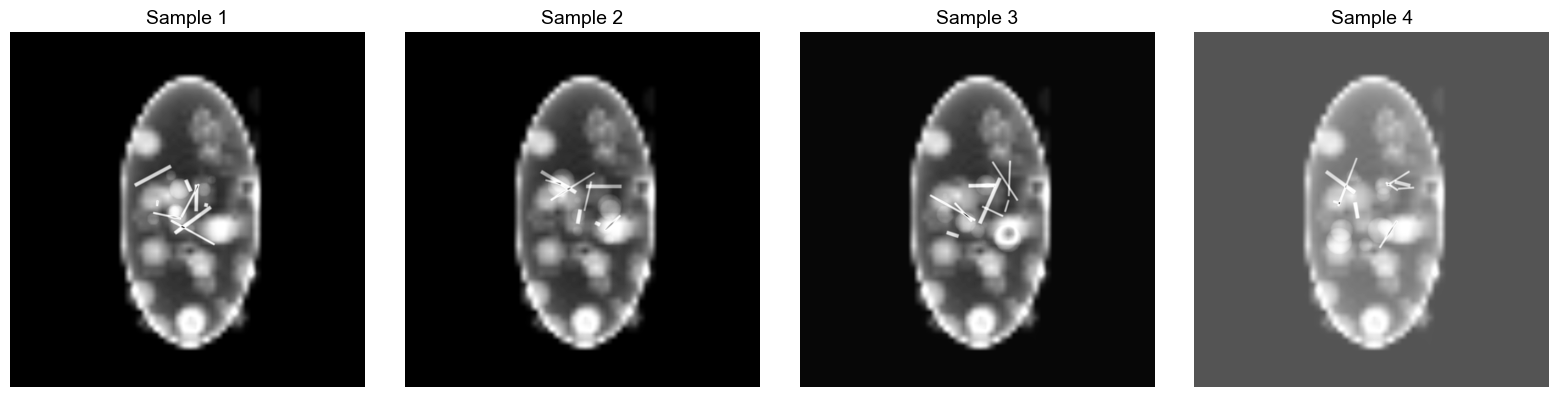

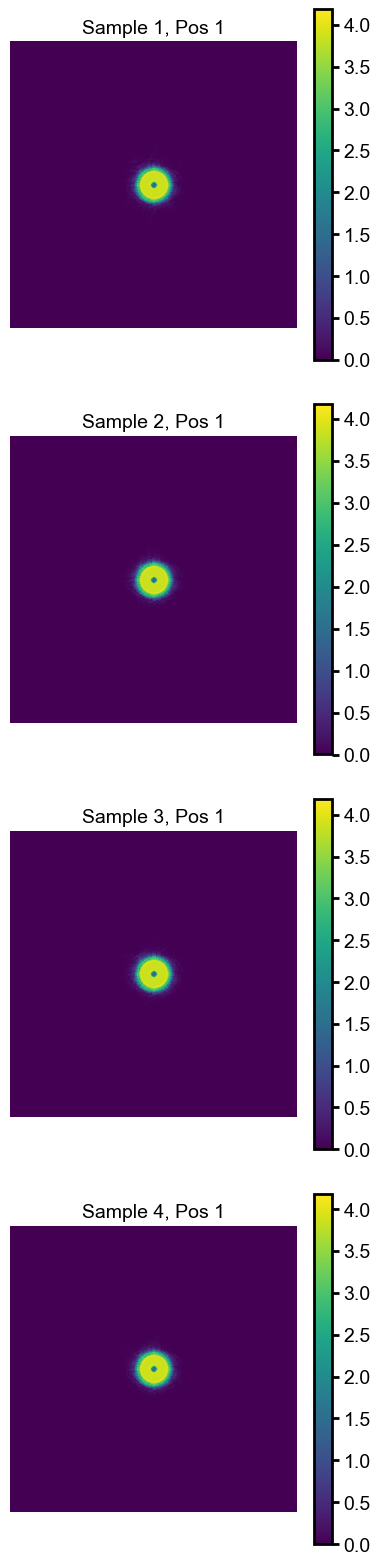

In [4]:
images = system.toy_images(batch_size=4)
orig_measurements = system.forward_model(images,learnable_params=None)
system.visualize_measurements(images, orig_measurements)

## 3. Set Up Optimization

In [5]:
# Configure optimizer
learning_rate = 1e-1
optimizer = optax.adam(learning_rate)

# Initialize tracking variables
best_mi = float('-inf')
best_mask = None

## 4. Run Information Optimization

In [10]:
results = system.info_optimize(
        optimizer=optimizer,
        model='pixel_cnn',
        n_iterations=5,
        patch_size=8,
        batch_size=4
    )

/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=float64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)
training: 100%|██████████| 10/10 [00:15<00:00,  1.57s/it]
Evaluating NLL: 3it [00:01,  2.80it/s]


Iteration 0: MI = -295922.040


/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=float64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)
training: 100%|██████████| 10/10 [00:17<00:00,  1.73s/it]
Evaluating NLL: 3it [00:01,  2.81it/s]


Iteration 1: MI = -219807121589.635


/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=float64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)
training: 100%|██████████| 10/10 [00:16<00:00,  1.62s/it]
Evaluating NLL: 3it [00:01,  2.68it/s]


Iteration 2: MI = -3573028239.645


/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=float64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)
training: 100%|██████████| 10/10 [00:16<00:00,  1.62s/it]
Evaluating NLL: 3it [00:01,  2.74it/s]


Iteration 3: MI = -147.248


/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=float64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/home/nmsingh/miniconda3/envs/info_theory/lib/python3.10/site-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)
training: 100%|██████████| 10/10 [00:16<00:00,  1.64s/it]
Evaluating NLL: 3it [00:01,  2.70it/s]


Iteration 4: MI = -11741988396.257


### 5. Visualize Results

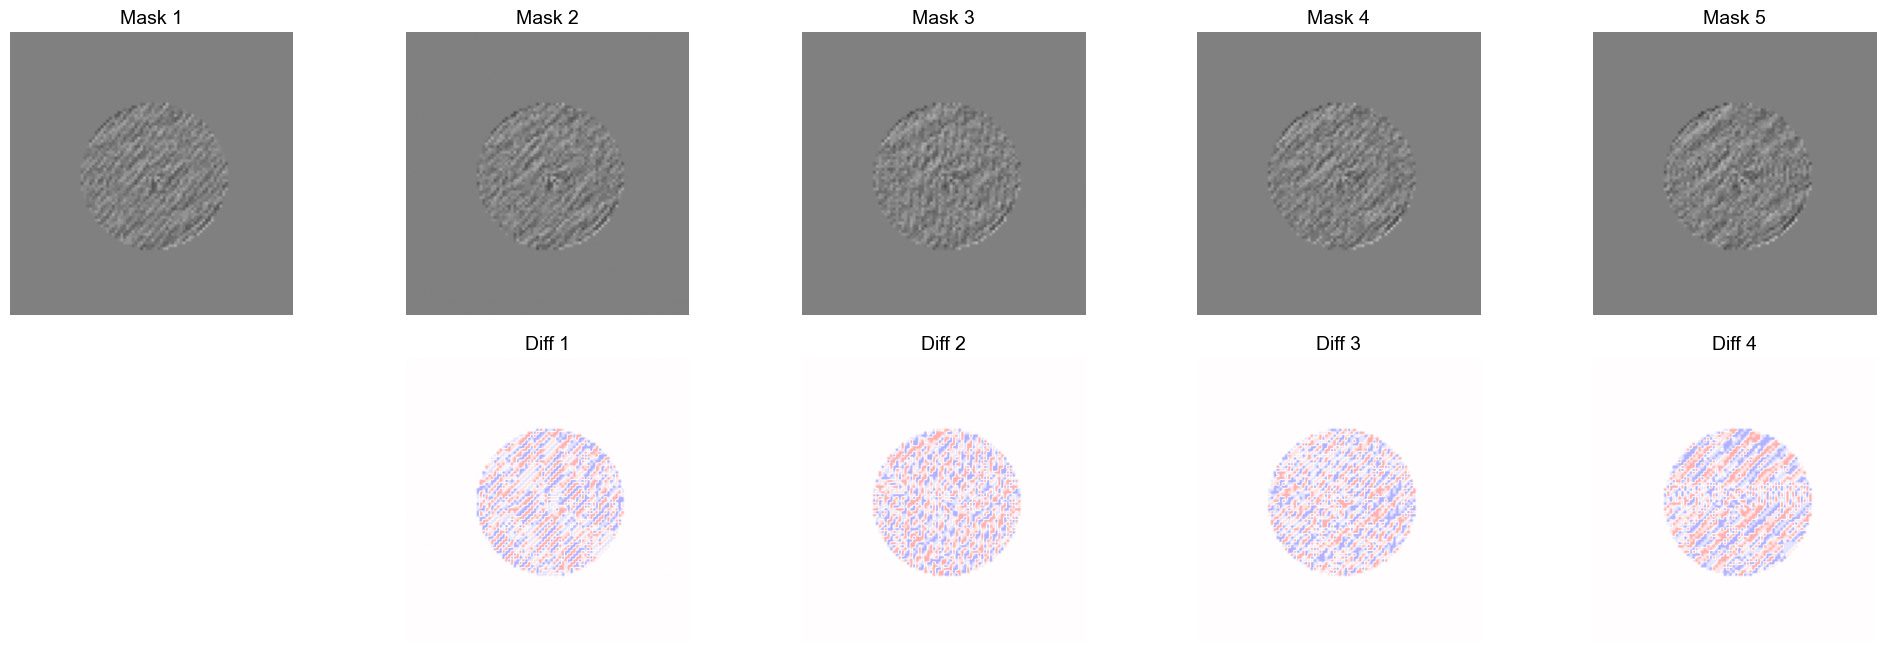

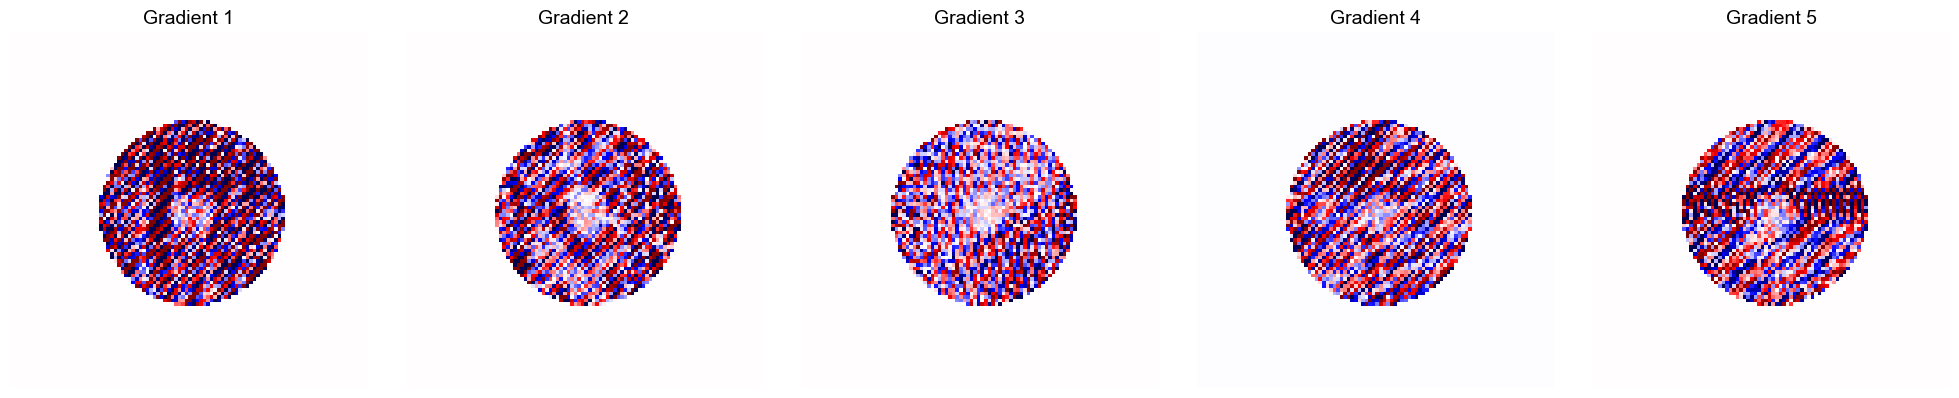

In [11]:

# Visualize masks and gradients

plt.figure(figsize=(20, 10))
for i in range(5):
    # Plot sigmoided mask
    plt.subplot(3, 5, i+1)
    sigmoided = np.asarray(nn.sigmoid(results['learned_param_history'][i][205:305,205:305]))
    plt.imshow(sigmoided, cmap='gray',vmin=0,vmax=1)
    plt.title(f'Mask {i+1}')
    plt.axis('off')
    
    # Plot difference from previous mask
    plt.subplot(3, 5, i+6)
    if i == 0:
        plt.imshow(np.zeros((100,100)), cmap='gray',vmin=-1,vmax=0)
    else:
        diff = np.asarray(results['learned_param_history'][i][205:305,205:305]) - \
               np.asarray(results['learned_param_history'][i-1][205:305,205:305])
        plt.imshow(diff, cmap='seismic', vmin=-2, vmax=2)
        plt.title(f'Diff {i}')
    plt.axis('off')

plt.tight_layout()

# Create figure with all 5 gradients in a row
plt.figure(figsize=(20, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(results['grad_history'][i]['mask'][205:305,205:305], cmap='seismic',vmin=-0.01,vmax=0.01)
    plt.title(f'Gradient {i+1}')
    plt.axis('off')
plt.tight_layout()

(<Figure size 1500x500 with 6 Axes>, <Figure size 1500x500 with 6 Axes>)

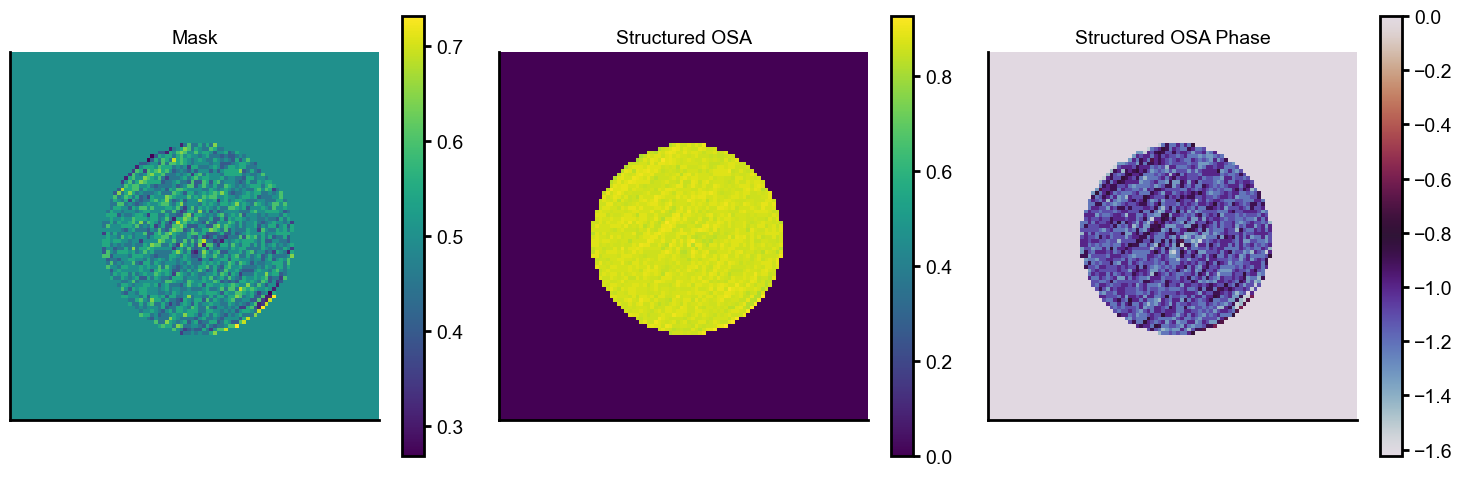

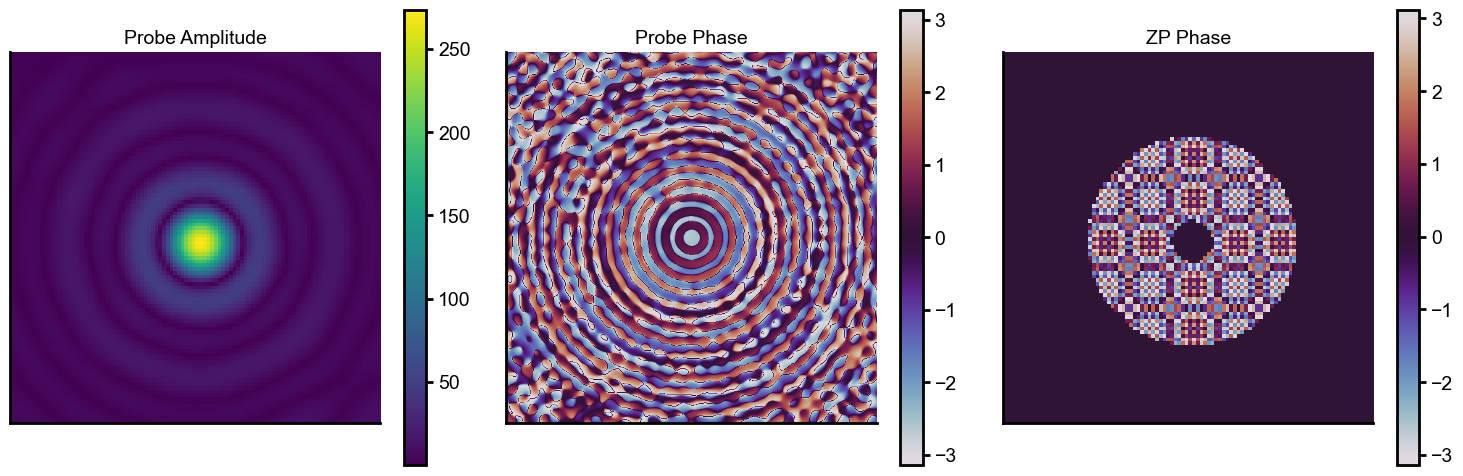

In [12]:
# Visualize updated system
system.visualize_system()

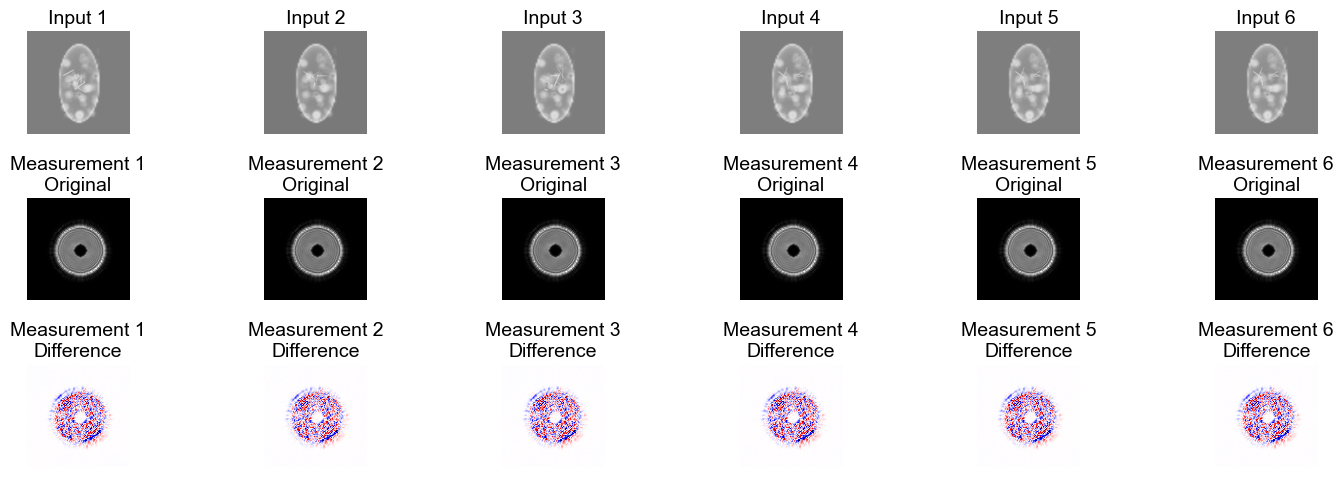

In [14]:
# Visualize changes in measurements
new_measurements = system.forward_model(images,learnable_params=None)
plt.figure(figsize=(15, 5))
for i in range(6):
    # Original input images
    plt.subplot(3, 6, i+1)
    plt.imshow(images[i], cmap='gray',vmin=0,vmax=2)
    plt.title(f'Input {i+1}')
    plt.axis('off')
    
    # Original measurements
    plt.subplot(3, 6, i+7)
    plt.imshow(orig_measurements[i][205:305,205:305], cmap='gray')
    plt.title(f'Measurement {i+1}\nOriginal')
    plt.axis('off')
    
    # Difference
    plt.subplot(3, 6, i+13)
    diff = (new_measurements[i]-orig_measurements[i])[205:305,205:305]
    plt.imshow(diff, cmap='seismic',vmin=-4000,vmax=4000)
    plt.title(f'Measurement {i+1}\nDifference')
    plt.axis('off')
plt.tight_layout()
